In [1]:
import pandas as pd
import os
import sys
from importlib import reload
import matplotlib.pyplot as plt

os.chdir('/content/drive/Othercomputers/My MacBook Air/Taxes_and_other_forms/lifecycle_investing')

In [2]:
!pip install numpy-financial

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [46]:
import lc_investing.constant_percent_stock
lc_investing.constant_percent_stock = reload(lc_investing.constant_percent_stock)

s = lc_investing.constant_percent_stock.Simulation()
# df=s.calc_retirement_savings_before_period()

real_return = s.calc_real_return(monthly_data=s.monthly_data,
                                 percentage_target=s.percentage_target,
                                 data_month=s.data_month)
real_return.head()

,cohort_num,begins_work,retire,period_num,month,Months_beginning_Jan_1871,Monthly_real_gov_bond_rate,Monthly_real_margin_rate,Monthly_real_stock_rate
0,1,1871,1914,1,1,1.0,-0.017899,-0.024531,-0.011781
3278,1,1871,1914,2,2,2.0,-0.005142,-0.011273,0.014230
6556,1,1871,1914,3,3,3.0,0.047218,0.041445,0.072026
9834,1,1871,1914,4,4,4.0,0.029103,0.028105,0.053836
13112,1,1871,1914,5,5,5.0,0.021747,0.018708,0.011920


In [ ]:
s.monthly_data.head()

In [42]:
s.head()

AttributeError: ignored

In [4]:
import lc_investing.constant_percent_stock
lc_investing.constant_percent_stock = reload(lc_investing.constant_percent_stock)

import lc_investing.create_cohorts
lc_investing.create_cohorts = reload(lc_investing.create_cohorts)

import lc_investing.monthly_data
lc_investing.monthly_data = reload(lc_investing.monthly_data)


import lc_investing.contributions
lc_investing.contributions = reload(lc_investing.contributions)


df_monthly_data = lc_investing.monthly_data.create_monthly_data(bondadj=0,
                                                    margadj=0,
                                                    stockadj=0,
                                                    marginmonths=[],
                                                    marginreturn=[])
df_cohorts = lc_investing.create_cohorts.create_cohorts()


df_percentage_target = lc_investing.constant_percent_stock.Percentage_Target(df_cohorts,
                                                            lambdacons=0.75)

df_data_month = lc_investing.constant_percent_stock.Data_month(df_cohorts)

df_real_return = lc_investing.constant_percent_stock.Real_Return(df_cohorts=df_cohorts, 
                                                                 df_monthly_data=df_monthly_data,
                                                                 df_percentage_target=df_percentage_target,
                                                                 df_data_month=df_data_month)

df_income_contrib = lc_investing.contributions.create_income_contributions(incomemult=2.352172,
                                                             contrate=0.04)

df_contributions = lc_investing.contributions.create_contributions(df_income_contrib=df_income_contrib,
                                                      ssreplace=0.0,
                                                      rmm=0.00213711852838,
                                                      rfm=0.00211039468707308)

df_retirement_savings_before_period = lc_investing.constant_percent_stock.Retirement_savings_before_period(df_cohorts=df_cohorts,
                                                                                      df_contributions=df_contributions,
                                                                                      df_real_return=df_real_return)


df_retirement_savings_before_period.Final.median()

TypeError: ignored

In [10]:
import lc_investing.lifecycle_strategy
lc_investing.lifecycle_strategy = reload(lc_investing.lifecycle_strategy)

s = lc_investing.lifecycle_strategy.Simulation()
df=s.calc_retirement_savings_before_period()


PEadjust 0


In [11]:
s.retirement_savings_before_period.FINAL.mean()
s.retirement_savings_before_period.FINAL.std()
s.retirement_savings_before_period.FINAL.describe()

count    9.600000e+01
mean     1.223105e+06
std      4.533787e+05
min      3.871724e+05
25%      8.841381e+05
50%      1.146812e+06
75%      1.522653e+06
max      2.177424e+06
Name: FINAL, dtype: float64

,cohort_num,FINAL,emile
13,14,1006486.347,1.006486e+06
14,15,1362866.777,1.362867e+06


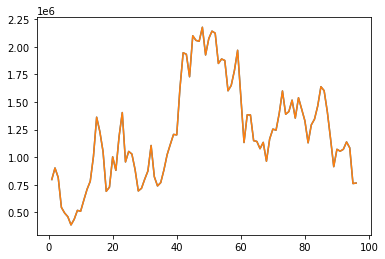

In [ ]:
# lifecycle_retirement_savings_before_period, FINAL

df1 = pd.read_csv('/content/drive/Othercomputers/My MacBook Air/Taxes_and_other_forms/Lifecycle_inveseting/lc_investing/Monthly_data_dir/lifecycle_retirement_savings_before_period.csv')

df2 = df1.loc[:, ['cohort_num','FINAL']]
df2.loc[:, 'emile'] = s.retirement_savings_before_period.FINAL

# df2 = df2.iloc[12:58, :]

plt.plot(df2.cohort_num, df2.FINAL)
plt.plot(df2.cohort_num, df2.emile)

df2.iloc[13:15]

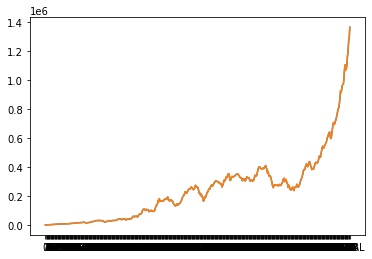

,cohort_num,begins_work,retire,period_num,actual,emile
0,15,1885,1928,0,0.000000,0.000000
1,15,1885,1928,1,157.453664,157.453664
2,15,1885,1928,2,333.819247,333.819247
3,15,1885,1928,3,510.095955,510.095954
4,15,1885,1928,4,663.659038,663.659037


In [ ]:
import matplotlib.pyplot as plt

# lifecycle_retirement_savings_before_period
df1 = pd.read_csv('/content/drive/Othercomputers/My MacBook Air/Taxes_and_other_forms/Lifecycle_inveseting/lc_investing/Monthly_data_dir/lifecycle_retirement_savings_before_period.csv')

cohort_num=15

df2 = pd.melt(df1.loc[df1.cohort_num==cohort_num], 
              id_vars=['cohort_num', 'begins_work', 'retire'],
              var_name='period_num',
              value_name='actual')

df2.loc[:, 'emile'] = s.retirement_savings_before_period.loc[s.retirement_savings_before_period.cohort_num==cohort_num, 0:].values.flatten()

# df2 = df2.iloc[516:519,:]

# Plot a simple line chart
plt.plot(df2.period_num, df2.actual)

# Plot another line on the same chart/graph
plt.plot(df2.period_num, df2.emile)

plt.show()
df2.head()

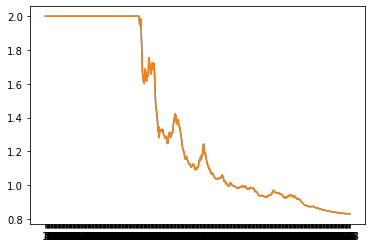

,cohort_num,begins_work,retire,period_num,actual,emile
1,15,1885,1928,1,2.0,2.0
2,15,1885,1928,2,2.0,2.0
3,15,1885,1928,3,2.0,2.0
4,15,1885,1928,4,2.0,2.0
5,15,1885,1928,5,2.0,2.0


In [ ]:
import matplotlib.pyplot as plt

# percentage_target
df3 = pd.read_csv('/content/drive/Othercomputers/My MacBook Air/Taxes_and_other_forms/Lifecycle_inveseting/lc_investing/Monthly_data_dir/percentage_target.csv')

cohort_num=15

df4 = pd.melt(df3.loc[df1.cohort_num==cohort_num], 
              id_vars=['cohort_num', 'begins_work', 'retire'],
              var_name='period_num',
              value_name='actual')

df4.loc[:, 'emile'] = s.percentage_target.loc[s.percentage_target.cohort_num==cohort_num, 0:].values.flatten()

df4 = df4.iloc[1:, :]

# Plot a simple line chart
plt.plot(df4.period_num, df4.actual)

# Plot another line on the same chart/graph
plt.plot(df4.period_num, df4.emile)

plt.show()
df4.head()

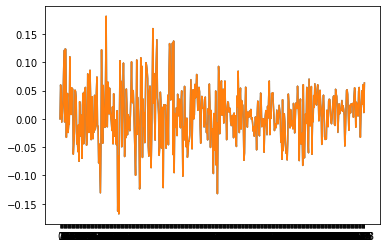

,cohort_num,begins_work,retire,period_num,actual,emile
0,15,1885,1928,0,0.000000,0.000000
1,15,1885,1928,1,0.060056,0.060056
2,15,1885,1928,2,0.038315,0.038315
3,15,1885,1928,3,-0.005828,-0.005828
4,15,1885,1928,4,0.010240,0.010240


In [ ]:
import matplotlib.pyplot as plt

# real_returns
df3 = pd.read_csv('/content/drive/Othercomputers/My MacBook Air/Taxes_and_other_forms/Lifecycle_inveseting/lc_investing/Monthly_data_dir/real_returns.csv')

cohort_num=15

df4 = pd.melt(df3.loc[df3.cohort_num==cohort_num], 
              id_vars=['cohort_num', 'begins_work', 'retire'],
              var_name='period_num',
              value_name='actual')

df4.loc[:, 'emile'] = s.real_returns.loc[s.real_returns.cohort_num==cohort_num, 0:].values.flatten()

# df4 = df4.iloc[515:518,:]

# Plot a simple line chart
plt.plot(df4.period_num, df4.actual)

# Plot another line on the same chart/graph
plt.plot(df4.period_num, df4.emile)

plt.show()
df4.head()

In [ ]:
import lc_investing.birthday_rule
lc_investing.birthday_rule = reload(lc_investing.birthday_rule)

import lc_investing.create_cohorts
lc_investing.create_cohorts = reload(lc_investing.create_cohorts)

import lc_investing.monthly_data
lc_investing.monthly_data = reload(lc_investing.monthly_data)


import lc_investing.contributions
lc_investing.contributions = reload(lc_investing.contributions)


df_monthly_data = lc_investing.monthly_data.create_monthly_data(bondadj=0,
                                                    margadj=0,
                                                    stockadj=0,
                                                    marginmonths=[],
                                                    marginreturn=[])
df_cohorts = lc_investing.create_cohorts.create_cohorts()


df_percentage_target = lc_investing.birthday_rule.Percentage_Target(df_cohorts,
                                                            birthint=0.9,
                                                            birthfin=0.5)

df_data_month = lc_investing.birthday_rule.Data_month(df_cohorts)

df_real_return = lc_investing.birthday_rule.Real_Return(df_cohorts=df_cohorts, 
                                                                 df_monthly_data=df_monthly_data,
                                                                 df_percentage_target=df_percentage_target,
                                                                 df_data_month=df_data_month)

df_income_contrib = lc_investing.contributions.create_income_contributions(incomemult=2.352172,
                                                             contrate=0.04)

df_contributions = lc_investing.contributions.create_contributions(df_income_contrib=df_income_contrib,
                                                      ssreplace=0.0,
                                                      rmm=0.00213711852838,
                                                      rfm=0.00211039468707308)

df_retirement_savings_before_period = lc_investing.birthday_rule.Retirement_savings_before_period(df_cohorts=df_cohorts,
                                                                                      df_contributions=df_contributions,
                                                                                      df_real_return=df_real_return)

df_retirement_savings_before_period.Final.median()

638671.7090765827

In [ ]:
import lc_investing.constant_percent_stock
lc_investing.constant_percent_stock = reload(lc_investing.constant_percent_stock)

import lc_investing.create_cohorts
lc_investing.create_cohorts = reload(lc_investing.create_cohorts)


df = lc_investing.create_cohorts.create_cohorts()


df1 = lc_investing.constant_percent_stock.Data_month(df)
df1.head(2)

df1.iloc[:, [0, 530]].head(2)

,cohort_num,528
0,1,528
1,2,540
